# Greetings and a warm welcome to **Group 5's** Colab Notebook!

Please run the following codes to mount the drive and change it's directory, as well as import the following packages so the rest of the codes run smoothly!

In [5]:
!pip install sympy

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
!pip install scipy
from scipy import integrate
from scipy.integrate import solve_ivp
import sympy as sp
import math
import copy

#Our group aims to model the **Three Body Problem** using Python!

##Overview

The **Three Body Problem** is defined as the study of the motion of three **point mass particles** interacting through gravitational forces, often applied in astrodynamics to analyse scenarios like the Moon orbiting the Earth influenced by the Sun. It involves complex mathematical formulations due to the lack of a general solution, leading to the consideration of simplified models based on physical reasoning. <sup>1

Our project is conducted in three phases, where Phase 1 is the **Modelling** process, where we try to turn physics concepts and equations into code for visualisation. Phase 2 is the **Application** where we try to generalise our simulation to N-Body problem. Phase 3 is the **Improvements** process to increase the accuracy of our model by implementing checkers and trying out different method.

<sup>1 </sup> *ScienceDirect. (n.d.). Three-body problem. Retrieved October 28, 2024, from https://www.sciencedirect.com/topics/physics-and-astronomy/three-body-problem*

#Phase 1: Modelling

## Defining One Body
**One Body** is defined as a **point mass** (this is a key assumption for the first part of our code).
To start, we utilise Object-Oriented Programming (OOP) to define a class 'Planet'.

We created this class to define a planet's essential parameters, including the planet's **position, mass, and velocity**. (Numpy array is used for the position, velocity and acceleration parameters as they are vectors in 3D.)

We chose to use classes to store the parameters due to its clear organisation and reusability, this becomes useful when we have more bodies to handle.

In [7]:
class Planet:
    def __init__(self, position, mass, velocity):
        self.position = np.array(position, dtype = float)   # standardise data type
        self.mass = mass
        self.velocity = np.array(velocity, dtype = float)
        self.acc = np.array([0,0,0])   # acceleration, in 3D

## Two Body Problem
The parameters assigned to the one body are only for initialisation. To make it meaningful, we will look into how two bodies interact and update their movements accordingly.


> In classical mechanics, the two-body problem is to calculate and predict the motion of two massive bodies that are orbiting each other in space. The problem assumes that the two bodies are point particles that interact only with one another; the only force affecting each object arises from the other one, and all other objects are ignored. The most prominent example of the classical two-body problem is the gravitational case, arising in astronomy for predicting the orbits (or escapes from orbit) of objects such as satellites, planets, and stars. A two-point-particle model of such a system nearly always describes its behavior well enough to provide useful insights and prediction.

### Two-Body Simulation


#### **Formulae involved**

Considering two bodies: the Earth and the Sun, and the gravitational force between them, we will obtain the following equations:
$$
m_{1}a_{1} = \dfrac{Gm_{1}m_{2}}{|r|^3}(\vec{r}_{2}-\vec{r}_{1})\hspace{1cm} Sun-Earth\\
m_{2}a_{2} = \dfrac{Gm_{1}m_{2}}{|r|^3}(\vec{r}_{1}-\vec{r}_{2})\hspace{1cm}              Earth-Sun
$$


Cancelling out the common mass terms for both equations, we will be able to get the expression for **acceleration** for each body:
$$
Earth\ acceleration : a_{1} = \dfrac{Gm_{2}}{|r|^3}(\vec{r}_{2}-\vec{r}_{1})\hspace{1cm} Sun-Earth\\
Sun\ acceleration : a_{2} = \dfrac{Gm_{1}}{|r|^3}(\vec{r}_{1}-\vec{r}_{2})\hspace{1cm}              Earth-Sun
$$

*   $|r|$ refers to the magnitude of the seperation vector between the two bodies

#### **Euler's method**

This is a 1st-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value.<sup>2 </sup>

With the forces involved and the initial paramters defined, we can now apply Newton's Second Law which states that $F=ma$ to calculate the body's updated position, velocity, and acceleration after a certain time (delta).

In our function `update`, we make use of Euler's Method and employ the following formulae:
\
\
The new velocity is calculated using: $\vec{v}_{new} = \vec{v}_{old} + \vec{a} \cdot \Delta t $


The new position is calculated using: $\vec{r}_{new} = \vec{r}_{old} + \vec{v}_{new} \cdot \Delta t $




<sup>2 </sup> *Butcher, John C. (2003). Numerical Methods for Ordinary Differential Equations. New York: John Wiley & Sons.*


In [8]:
# 2 body system using Euler's Method
G = 10 # we use 10 for simplicity but actual value of G = 6.67430 * 10**(-11)

class Planet:
    def __init__(self, position, mass, velocity):
        self.position = np.array(position, dtype=float) # position is represented as vector using numpy array
        self.mass = mass
        self.velocity = np.array(velocity, dtype=float)
        self.acc = np.array([0,0,0])

    # We update the bodies' parameters using Euler's method.
    def update(self, delta, other_planet):
        # calculate separation between home planet and other planet
        separation_vector = other_planet.position - self.position
        separation_magnitude = np.linalg.norm(separation_vector)

        # update acceleration of home planet
        self.acc = (G * other_planet.mass) / (separation_magnitude**3) * separation_vector

        # update velocity of home planet
        self.velocity += self.acc * delta

        # calculate new position of planet after a certain time step (delta)
        self.position += self.velocity * delta

    def copy(self):
        # Create a deep copy of the Planet so that we can retain the data from previous time points
        p = Planet(self.position.copy(), self.mass, self.velocity.copy())
        p.acc = self.acc.copy()
        return p

### Two-Body Problem Visualisation

Next, we define a function **two_body** to simulate the two bodies' movements through space.

We will use the Earth and Sun system for the two-body simulation, setting arbitrary values for the parameters of each Planet.

**two_body** takes in arguments including the end time and delta, which is the time interval between the generation of each point. From that we use the **update** function and **matplotlib.animation** to visualise the interactions.

In [9]:
# Initialize the planets with positions, masses, and velocities (with arbitrary values)
earth = Planet((0, 0, 0), 1000, (0, 25, 0))
sun = Planet((150, 150, 150), 10000, (0, 0, 0))

In [10]:
def two_body(end, delta=1):

    # Set up the figure and 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # set the plot limits and labels
    ax.set_xlim(-500, 500)
    ax.set_ylim(-500, 500)
    ax.set_zlim(-500, 500)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Two-Body Motion')

    # Initialize plots for Earth and Sun
    earth_plot, = ax.plot([], [], [], 'bo', label='Earth')  # Blue dot
    sun_plot, = ax.plot([], [], [], 'ro', label='Sun')      # Red dot
    earth_path, = ax.plot([], [], [], 'b-', label='Earth path')  # Blue line
    sun_path, = ax.plot([], [], [], 'r-', label='Sun path')   # Red line

    # Trajectories for Earth and Sun
    earth_trajectory = np.empty((0, 3))
    sun_trajectory = np.empty((0, 3))

    # Initialize plot elements
    def init():
        for plot, path in [(earth_plot, earth_path), (sun_plot, sun_path)]:
            plot.set_data([], [])
            plot.set_3d_properties([])
            path.set_data([], [])
            path.set_3d_properties([])
        return earth_plot, sun_plot, earth_path, sun_path

    # Update function for animation
    def update(frame):
        nonlocal earth_trajectory, sun_trajectory

        # Copy current states
        old_sun = sun.copy()
        old_earth = earth.copy()

        # Update parameters
        sun.update(delta, earth)
        earth.update(delta, old_sun)

        # Update plot data for Earth and Sun
        earth_plot.set_data([earth.position[0]], [earth.position[1]])
        earth_plot.set_3d_properties([earth.position[2]])
        sun_plot.set_data([sun.position[0]], [sun.position[1]])
        sun_plot.set_3d_properties([sun.position[2]])

        # Update trajectories
        earth_trajectory = np.vstack([earth_trajectory, earth.position])
        sun_trajectory = np.vstack([sun_trajectory, sun.position])

        earth_path.set_data(earth_trajectory[:, 0], earth_trajectory[:, 1])
        earth_path.set_3d_properties(earth_trajectory[:, 2])  # Z-axis for Earth
        sun_path.set_data(sun_trajectory[:, 0], sun_trajectory[:, 1])
        sun_path.set_3d_properties(sun_trajectory[:, 2])  # Z-axis for Sun

        return earth_plot, sun_plot, earth_path, sun_path

    # Create the animation
    ani = animation.FuncAnimation(fig=fig, func=update, frames=int(end / delta),
                                  init_func=init, blit=True, interval=100)

    return ani

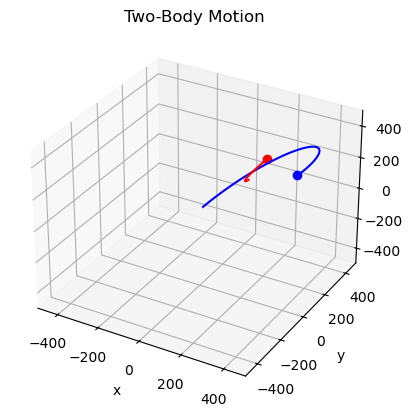

In [11]:
two_body(100) #slide 7

## Three Body Problem: Euler's Method

Now that we've established our two body system, we can finally move on to the **THREE BODY PROBLEM**. We will first approach this using Euler's Method, just as how we approached the two body problem.

We used the same class 'Planet' except our codes now incorporate a third body of course! We have also ensured that the body's radius is passed as an argument.

We differentiate the three planets by calling them "home" planet, "other planet 1", and "other planet 2".

\
###**Formulae involved**

In a three-body system, where we consider the Sun, Earth, and Moon, each body exerts a gravitational force on the others.

For each planet (e.g. "home" planet), the gravitational acceleration $a⃗$ caused by two other bodies (e.g. "other planet 1" and "other planet 2") can be calculated as:

$$
\vec{a} = \frac{G \cdot m_1}{|\vec{r}_{12}|^3} \cdot \vec{r}_{12} + \frac{G \cdot m_2}{|\vec{r}_{13}|^3} \cdot \vec{r}_{13}
$$

Where:
- $G$ is the gravitational constant
- $m_1$ and $m_2$ are the masses of the other two planets
- $\vec{r}_{12} = \vec{r}_{1} - \vec{r}_{2}$ is the separation vector between "other planet 1" and the "home" planet
- $\vec{r}_{13} = \vec{r}_{1} - \vec{r}_{3}$ is the separation vector between "other planet 2" and the "home" planet
- $|\vec{r}_{12}|$ and $|\vec{r}_{13}|$ are the magnitudes of these separation vectors


In [12]:
# 3 body using Euler's method: class Planet redefined
G = 10 # we use 10 for simplicity but actual value of G = 6.67430 *10**(-11)

class Planet:
  def __init__(self, position, mass, velocity):
    self.position = np.array(position,dtype=float) # input a tuple or array of any dimension
    self.mass = mass
    self.velocity = np.array(velocity,dtype=float)
    self.acc = np.zeros(len(position),dtype=float) # initial acc is 0 on all axes before being updated

  def update(self, delta, other_planet1, other_planet2):
    # calculate separation between home planet and planet 1
    separation_vector1 = other_planet1.position - self.position # returns a vector
    separation_magnitude1=np.linalg.norm(separation_vector1)

    separation_vector2 = other_planet2.position - self.position # returns a vector
    separation_magnitude2=np.linalg.norm(separation_vector2)

    # to calculate new acceleration of home planet
    self.acc = (G * other_planet1.mass)/(separation_magnitude1**3) * separation_vector1 + (G * other_planet2.mass)/(separation_magnitude2**3) * separation_vector2

    # calculate new velocity of home planet
    self.velocity += self.acc * delta # delta is change in time (in update)

    # calculate new position of home planet after a certain time step (delta)
    self.position += self.velocity * delta

    # to return a copy of the planet's original state
  def copy(self):
    p = Planet(self.position.copy(), self.mass, self.velocity.copy())
    p.acc = self.acc.copy()
    return p

In [13]:
# Initialize the planets with positions, masses, and velocities (with arbitrary values)
earth = Planet((0, 0, 0), 1000, (0, 25, 0))
sun = Planet((150, 150, 150), 10000, (0, 0, 0))
moon = Planet((75, 75, 75), 100, (0, 30, 10))

In [14]:
def three_body(end, delta=1):

  # Set up the figure and 3D axis
  fig = plt.gcf()
  ax = plt.gcf().add_subplot(projection='3d')

  # Set plot limits and labels
  ax.set(xlim=(-500, 500), ylim=(-500, 500), zlim=(-500, 500))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.set_title('Three-body Motion')

  # Initialize plots for Earth, Sun and Moon
  earth_plot, = ax.plot([],[],[],'bo', label='Earth')
  earth_path, = ax.plot([],[],[],'b-',label='Earth path')

  sun_plot, = ax.plot([],[],[],'ro', label='Sun')
  sun_path, = ax.plot([],[],[],'r-',label='Sun path')

  moon_plot, = ax.plot([],[],[],'yo', label='Moon')
  moon_path, = ax.plot([],[],[],'y-',label='Moon path')

  # Update trajectories
  earth_trajectory = np.empty((0, 3))
  sun_trajectory = np.empty((0, 3))
  moon_trajectory=np.empty((0,3))

  # Initialize plot elements
  def init():
    for plot, path in [(earth_plot, earth_path), (sun_plot, sun_path), (moon_plot, moon_path)]:
        plot.set_data([], [])
        plot.set_3d_properties([])
        path.set_data([], [])
        path.set_3d_properties([])
    return earth_plot, earth_path, sun_plot, sun_path, moon_plot, moon_path

  # Function to update positions and trajectories in each animation frame
  def update(frame):
    nonlocal earth_trajectory, sun_trajectory, moon_trajectory

    # Copy the previous states of each celestial body
    oldsun,oldearth,oldmoon = sun.copy(),earth.copy(),moon.copy()

    # Update each body's position based on the gravitational effect of the others
    sun.update(delta,earth,moon)
    earth.update(delta,oldsun,moon)
    moon.update(delta,oldsun,oldearth)

    # Update the current positions of the bodies in the plot
    for planet, plot in [(earth, earth_plot), (sun, sun_plot), (moon, moon_plot)]:
        plot.set_data([planet.position[0]], [planet.position[1]])
        plot.set_3d_properties([planet.position[2]])

    # Append the current positions to the trajectory arrays
    earth_trajectory = np.vstack([earth_trajectory, earth.position])# to stack a list of 1D arrays vertically(row by row) to form a 2D array
    sun_trajectory = np.vstack([sun_trajectory, sun.position])
    moon_trajectory = np.vstack([moon_trajectory, moon.position])

    # Update the trajectory paths in the plot
    for trajectory, path in [(earth_trajectory, earth_path), (sun_trajectory, sun_path), (moon_trajectory, moon_path)]:
        path.set_data(trajectory[:, 0], trajectory[:, 1])
        path.set_3d_properties(trajectory[:, 2])

    return earth_plot, sun_plot, earth_path, sun_path, moon_plot, moon_path

  # Create the animation
  ani = animation.FuncAnimation(fig=fig, func=update, frames=int(end / delta), init_func=init, blit=True, interval=100)

  return ani

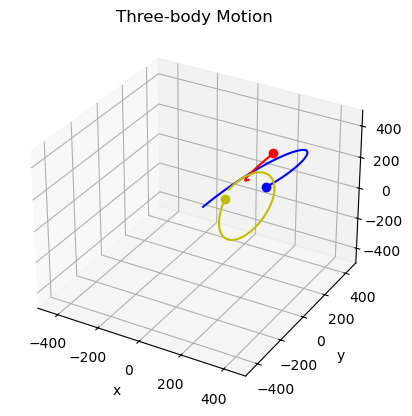

In [15]:
three_body(100) #slide 13

# Phase 2: Application

## N-body systems: Euler's Method

Since a three body system is actually a subset of an N-body system, we can easily use the same concept of solving the three body problem to approach the N-body problem!

In an N-body system, we simulate the gravitational interactions between multiple bodies, this allows us to analyse more complex systems with a higher number of bodies and is a generalisation of the two and three body systems.

\
###**Formulae involved**
The gravitational force exerted by body j on body  i is given by Newton's law of gravitation:
\
\
$$
\vec{F}_{ij} = G \cdot \frac{m_i \cdot m_j}{|\vec{r}_{ij}|^2} \cdot \hat{r}_{ij}
$$

Where:
- G is the gravitational constant
- $m_j$ and $m_i$ are the masses of bodies j and i respectively
- $\vec{r}_{ij} = \vec{r}_{j} - \vec{r}_{i}$ is the separation vector between the two bodies
- $|\vec{r}_{ij}|$ is the magnitude of the separation vector
- is the unit vector in the direction of the force

\
The acceleration of body i due to the gravitational influence of all other bodies is calculated using:
$$
\vec{a}_i = \sum_{j=1}^{N} \frac{\vec{F}_{ij}}{m_i} = \sum_{j=1, j \neq i}^{N} \left( G \cdot \frac{m_j}{|\vec{r}_{ij}|^2} \cdot \hat{r}_{ij} \right)
$$
which we have represented using a for loop.

\
In our function update_position_and_velocity, we make use of Euler's Method.
\
\
The new velocity is calculated using: $\vec{v}_{new} = \vec{v}_{old} + \vec{a} \cdot \Delta t $


The new position is calculated using: $\vec{r}_{new} = \vec{r}_{old} + \vec{v}_{new} \cdot \Delta t $

In [16]:
# N body system
delta = 0.001 # We have chosen this as our time step.

# Gravitational constant (G)
G = 6.67430e-11  # the units are m^3 kg^-1 s^-2

class Body:
    # First, we pass the body's position, velocity and mass as arguments in the initialisation step and separately initialise acceleration as a zero vector.
    def __init__(self, position, velocity, mass):
        self.position = np.array(position, dtype=float)  # Position vector (x, y, z)
        self.velocity = np.array(velocity, dtype=float)  # Velocity vector (vx, vy, vz)
        self.mass = mass  # Mass of the body
        self.acceleration = np.array([0,0,0], dtype=float)

    def update_acceleration(self, bodies):
        self.acceleration =  np.array([0,0,0],dtype=float) # We reset acceleration so previous calculations are not carried over.

        # Since there are multiple bodies, we use a for loop to iterate through all the other bodies to compute the gravitational force exerted on the current body.
        for other_planet in bodies:
            if other_planet is not self:  # Do not calculate a body's force on itself
                # Compute the vector from this body to the other body
                separation = other_planet.position - self.position # This gives the vector distance between the two bodies.
                distance = np.linalg.norm(separation)  # This gives the magnitude of the separation vector.
                if distance != 0:
                    # Gravitational force formula: F = G * (m1 * m2) / r^2
                    force_magnitude = G * self.mass * other_planet.mass / distance**2
                    force_direction = separation / distance  # Unit vector in the direction of the force
                    force = force_magnitude * force_direction # Vector force
                    self.acceleration += force / self.mass  # F = ma -> a = F/m

    def update_position_and_velocity(self, delta):
        # Euler's method: new position = old position + velocity * delta_t
        # Euler's method: new velocity = old velocity + acceleration * delta_t
        self.velocity += self.acceleration * delta
        self.position += self.velocity * delta

### **The `simulate` function**

We define a new function which creates one list to store the position vectors for each body at each time step.

In [17]:
def simulate(bodies, delta, num_steps):
    positions = [[] for _ in bodies]  # This creates list to store the positions of each body.

    for _ in range(num_steps):
        # Update accelerations first
        for body in bodies:
            body.update_acceleration(bodies)

        # Then we update the bodies' positions and velocities.
        for i, body in enumerate(bodies):
            body.update_position_and_velocity(delta)
            positions[i].append(body.position.copy())

    return positions

### **Animate Trajectories**

Lastly, we plot the positions of the bodies using the `FuncAnimation` from `matplotlib` and index into `positions` for each frame.
This plotting is carried out by the `animate-trajectories` function


In [18]:
# We define a function to animate the simulation
def animate_trajectories(positions, num_steps, delta_t, use_minmax=True, lim=2e11):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Planetary Motion')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set the limits of the plot
    all_x = np.concatenate([np.array(pos)[:, 0] for pos in positions])
    all_y = np.concatenate([np.array(pos)[:, 1] for pos in positions])
    all_z = np.concatenate([np.array(pos)[:, 2] for pos in positions])

    x_min, x_max = all_x.min(), all_x.max()
    y_min, y_max = all_y.min(), all_y.max()
    z_min, z_max = all_z.min(), all_z.max()

    if use_minmax:
      ax.set_xlim(x_min, x_max)
      ax.set_ylim(y_min, y_max)
      ax.set_zlim(z_min, z_max)
    else:
      ax.set_xlim(-lim, lim)
      ax.set_ylim(-lim, lim)
      ax.set_zlim(-2e11, 2e11)

    # Initialize the lines for the bodies (sun, earth, mars)
    lines = [ax.plot([], [], [], '*', markersize=2)[0] for i in range(len(bodies))]

    # Function to initialize the animation
    def init():
        for line in lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return lines

    # Function to update the animation at each frame
    def update(frame):
        for body, line in enumerate(lines):
            # Access the x, y, and z coordinates correctly
            x = [pos[0] for pos in positions[body][:frame + 1]]
            y = [pos[1] for pos in positions[body][:frame + 1]]
            z = [pos[2] for pos in positions[body][:frame + 1]]

            line.set_data(x, y)
            line.set_3d_properties(z)
        return lines

    # Adjust the interval (e.g., 50 ms per frame)
    ani = animation.FuncAnimation(fig, update, frames=num_steps, init_func=init, interval=20, blit=True)
    return ani

#### **Earth-Moon-Sun like System**

Let's set up a Earth-Moon-Sun like system.

We first initialise `bodies` with the coordinates of the Sun-like, Earth-like and Moon-like bodies.

We observe that their orbit is regular we see the Earth-Moon-like system orbit the larger mass regularly, with the Moon-like body orbiting the Earth-like body regulalry.

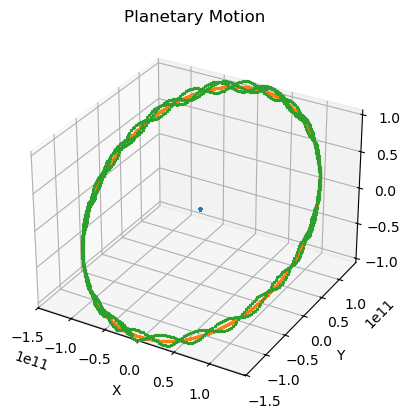

In [19]:
# Masses (in kg)
mass_sun = 1.989e30  # Mass of the Sun
mass_earth = 5.972e24  # Mass of the Earth
mass_moon = 7.34767309e22  # Mass of the Moon

# Initial positions (in metres)
position_sun = [0, 0, 0]  # Assume Sun is at the origin
position_earth = [1.496e11, 0, 0]  # Approximate distance from Earth to Sun
position_moon = [1.496e11 + 3.844e8, 0, 0]  # Approximate distance from Earth to Moon added to Earth's position

# Initial velocities (in m/s)
velocity_sun = [0, 0, 0]  # Assume no initial velocity for the Sun
velocity_earth = [0, 2.978e4, 2e2]
velocity_moon = [0, 2.978e4 + 1.022e3, 0]

# Create the Sun, Earth, and Moon bodies
bodies = [
    Body(position_sun, velocity_sun, mass_sun),  # Sun
    Body(position_earth, velocity_earth, mass_earth),  # Earth
    Body(position_moon, velocity_moon, mass_moon)  # Moon
]

# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 1000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

# Animate the results
animate_trajectories(positions, num_steps, delta_t)

### **Chaotic Four Body**


Three-body systems exhibit extreme sensitivity to initial conditions, which is characteristic of chaotic systems<sup>3 </sup>. Even tiny differences in initial positions or velocities can result in significantly different trajectories over time. This chaotic sensitivity often leads to one of the bodies eventually being ejected from the system.

In this simulation, we set up four bodies of equal mass with arbitrary initial velocities. Due to gravitational interactions and energy exchanges between the bodies. As seen, it is very chaotic without obvious orbits. It results in the blue and red body being ejected at high velocities.

<sup>3 </sup> *Igata, T. Chaos in a Generalized Euler’s Three-Body Problem. https://doi.org/10.48550/arXiv.2102.09992.*


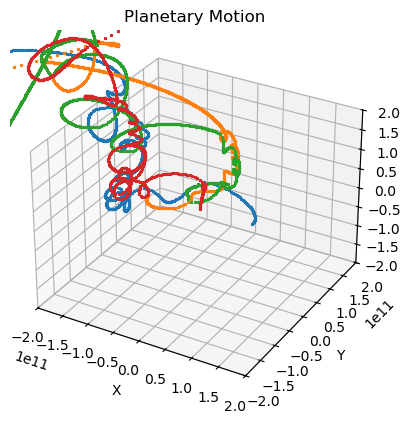

In [20]:
# body(position, velocity, mass)
# Define the four bodies with distinct initial positions and velocities

G = 6.67430e-11  # Gravitational constant

mass = 1.0e30  # Mass of each body

# Create three bodies with equal mass
bodies = [
    Body([1.0e11, 0, 0], [0, 2.0e4, 0], mass),  # Body 1
    Body([-1.0e11, 0, 0], [0, -2.0e4, 0], mass),  # Body 2
    Body([0, 1.0e11, 0], [-2.0e4, 0, 0], mass),   # Body 3
    Body([0, 0, 0], [0, 0, 2.0e4], mass) # Body 4
]
# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 1000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

# Animate the results
animate_trajectories(positions, num_steps, delta_t, use_minmax = False, lim = 2e11)

### Chaotic Four Body

By reducing the 4th body’s velocity by 5%, we observe a notable divergence in the trajectories of all bodies involved, highlighting the inherent sensitivity to initial conditions typical of chaotic systems.



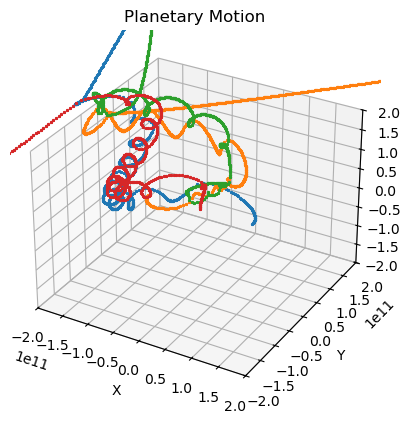

In [21]:
# body(position, velocity, mass)
# Define the four bodies with distinct initial positions and velocities

G = 6.67430e-11  # Gravitational constant

mass = 1.0e30  # Mass of each body

# Create three bodies with equal mass
bodies = [
    Body([1.0e11, 0, 0], [0, 2.0e4, 0], mass),  # Body 1
    Body([-1.0e11, 0, 0], [0, -2.0e4, 0], mass),  # Body 2
    Body([0, 1.0e11, 0], [-2.0e4, 0, 0], mass), # Body 3
    Body([0, 0, 0], [0, 0, 1.90e4], mass) # Body 4
]
# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 1000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

# Animate the results
animate_trajectories(positions, num_steps, delta_t, use_minmax = False, lim = 2e11)

### Predictive analysis
#### Solar System

Here we took planetary data from NASA's Horizons Systems on September 6, 1977, the day after Voyager 1's launch <sup>4 </sup> . We then simulate the orbits of the planets.

<sup>4 </sup> *Horizons System. (n.d.). https://ssd.jpl.nasa.gov/horizons/app.html#/*

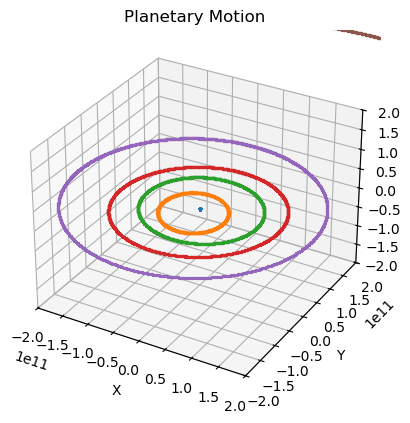

In [22]:
# Solar system
mass_sun = 1.989e30  # Sun's mass
mass_mercury = 3.301e23  # Mercury's mass
mass_venus = 4.867e24  # Venus's mass
mass_earth = 5.972e24  # Earth's mass
mass_mars = 6.39e23  # Mars's mass
mass_jupiter = 1.898e27  # Jupiter's mass
mass_saturn = 5.683e26  # Saturn's mass


# Initial positions (in meters) for approximate setup after launch on September 6, 1977
# Using data from September 6, 1977
positions = {
    "Sun": [3.54e8, -6.58e8, -9.55e6],
    "Mercury": [5.42e10, -1.39e10, -6.04e9],       # Avg distance from Sun
    "Venus": [1.91e10, 1.05e11, 3.53e8],        # Avg distance from Sun
    "Earth": [1.45e11, -4.32e10, -1.06e7],        # Avg distance from Sun
    "Mars": [1.32e11, 1.78e11, 4.79e8],         # Avg distance from Sun
    "Jupiter": [1.05e11, 7.55e11, -5.46e9],      # Avg distance from Sun
    "Saturn": [-1.08e12, 8.53e11, 2.78e7],       # Avg distance from Sun
}
for key, value in positions.items(): # Make coordinates with respect to sun
    positions[key] = np.array(value, dtype=float) - np.array(positions['Sun'],dtype=float)

# Initial velocities (in m/s) at launch on September 5, 1977
velocities = {
    "Sun": [0, 0, 0],
    "Mercury": [2.23e3,4.95e4, 3.84e3],        # Orbital velocity
    "Venus": [-3.46e4, 5.91e3, 2.08e3],           # Orbital velocity
    "Earth": [7.94e3, 2.85e4, 1.56e0],          # Orbital velocity
    "Mars": [-1.85e4, 1.65e4, 8.01e2],           # Orbital velocity
    "Jupiter": [-1.31e4, 2.40e3, 2.83e2],        # Orbital velocity
    "Saturn": [-6.52e3, -7.59e3, 3.93e2],          # Orbital velocity
}

# Create bodies for simulation
bodies = [
    Body(positions["Sun"], velocities["Sun"], mass_sun),      # Sun
    Body(positions["Mercury"], velocities["Mercury"], mass_mercury),  # Mercury
    Body(positions["Venus"], velocities["Venus"], mass_venus),      # Venus
    Body(positions["Earth"], velocities["Earth"], mass_earth),      # Earth
    Body(positions["Mars"], velocities["Mars"], mass_mars),        # Mars
    Body(positions["Jupiter"], velocities["Jupiter"], mass_jupiter),  # Jupiter
    Body(positions["Saturn"], velocities["Saturn"], mass_saturn),    # Saturn
]

# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 1000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

# Animate the results
animate_trajectories(positions, num_steps, delta_t, use_minmax = False, lim = 2e11)

#### Solar System + Voyager 1 (Zoom-In)

Next, we add in the initial velocity of Voyager 1 on September 6, 1977 and simulate its path. We see that it is headed towards Jupiter<sup>5 </sup>, which lines up with what happened in the actual mission.

<sup>5 </sup> *Horizons System. (n.d.). https://ssd.jpl.nasa.gov/horizons/app.html#/*

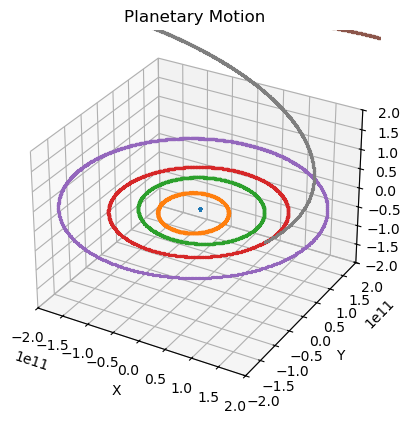

In [23]:
# Solar system for Voyager 1
mass_sun = 1.989e30  # Sun's mass
mass_mercury = 3.301e23  # Mercury's mass
mass_venus = 4.867e24  # Venus's mass
mass_earth = 5.972e24  # Earth's mass
mass_mars = 6.39e23  # Mars's mass
mass_jupiter = 1.898e27  # Jupiter's mass
mass_saturn = 5.683e26  # Saturn's mass
mass_voyager1 = 1e3  # Approximate mass of Voyager 1 (in kg)

# Initial positions (in meters) for approximate setup after launch on September 6, 1977
# Using data from September 6, 1977
positions = {
    "Sun": [3.54e8, -6.58e8, -9.55e6],
    "Mercury": [5.42e10, -1.39e10, -6.04e9],       # Avg distance from Sun
    "Venus": [1.91e10, 1.05e11, 3.53e8],        # Avg distance from Sun
    "Earth": [1.45e11, -4.32e10, -1.06e7],        # Avg distance from Sun
    "Mars": [1.32e11, 1.78e11, 4.79e8],         # Avg distance from Sun
    "Jupiter": [1.05e11, 7.55e11, -5.46e9],      # Avg distance from Sun
    "Saturn": [-1.08e12, 8.53e11, 2.78e7],       # Avg distance from Sun
    "Voyager 1": [1.45e11, -4.29e10, 1.60e7]     # Initially close to Earth
}
for key, value in positions.items(): # Make coordinates with respect to sun
    positions[key] = np.array(value, dtype=float) - np.array(positions['Sun'],dtype=float)

# Initial velocities (in m/s) at launch on September 5, 1977
velocities = {
    "Sun": [0, 0, 0],
    "Mercury": [2.23e3,4.95e4, 3.84e3],        # Orbital velocity
    "Venus": [-3.46e4, 5.91e3, 2.08e3],           # Orbital velocity
    "Earth": [7.94e3, 2.85e4, 1.56e0],          # Orbital velocity
    "Mars": [-1.85e4, 1.65e4, 8.01e2],           # Orbital velocity
    "Jupiter": [-1.31e4, 2.40e3, 2.83e2],        # Orbital velocity
    "Saturn": [-6.52e3, -7.59e3, 3.93e2],          # Orbital velocity
    "Voyager 1": [1.16e4, 3.81e4, 7.3e2]
}

# Create bodies for simulation
bodies = [
    Body(positions["Sun"], velocities["Sun"], mass_sun),      # Sun
    Body(positions["Mercury"], velocities["Mercury"], mass_mercury),  # Mercury
    Body(positions["Venus"], velocities["Venus"], mass_venus),      # Venus
    Body(positions["Earth"], velocities["Earth"], mass_earth),      # Earth
    Body(positions["Mars"], velocities["Mars"], mass_mars),        # Mars
    Body(positions["Jupiter"], velocities["Jupiter"], mass_jupiter),  # Jupiter
    Body(positions["Saturn"], velocities["Saturn"], mass_saturn),    # Saturn
    Body(positions["Voyager 1"], velocities["Voyager 1"], mass_voyager1)  # Voyager 1
]


# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 1000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

# Animate the results
animate_trajectories(positions, num_steps, delta_t, use_minmax = False, lim = 2e11)

#### Solar System + Voyager 1 (Zoom-Out)

Increasing the number of steps and zooming out, we see that the simulation deviates from reality. Rather than getting a gravitational assist from Jupiter <sup>6 </sup>, it just falls short and heads back towards the earth. It then forms a orbit around the sun.

What went wrong then?

This suggests the need for course corrections for it to reach Jupiter for its gravitational assist.  

<sup>6 </sup>*Bridgman, T. (2017, August 31). Voyager 1 Trajectory through the Solar System. NASA Scientific Visualization Studio. https://svs.gsfc.nasa.gov/4139/*

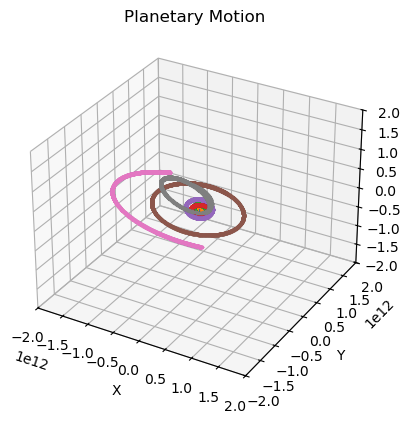

In [25]:
# Solar system for Voyager 1
mass_sun = 1.989e30  # Sun's mass
mass_mercury = 3.301e23  # Mercury's mass
mass_venus = 4.867e24  # Venus's mass
mass_earth = 5.972e24  # Earth's mass
mass_mars = 6.39e23  # Mars's mass
mass_jupiter = 1.898e27  # Jupiter's mass
mass_saturn = 5.683e26  # Saturn's mass
mass_voyager1 = 1e3  # Approximate mass of Voyager 1 (in kg)

# Initial positions (in meters) for approximate setup after launch on September 5, 1977
# Using data from September 6, 1977
positions = {
    "Sun": [3.54e8, -6.58e8, -9.55e6],
    "Mercury": [5.42e10, -1.39e10, -6.04e9],       # Avg distance from Sun
    "Venus": [1.91e10, 1.05e11, 3.53e8],        # Avg distance from Sun
    "Earth": [1.45e11, -4.32e10, -1.06e7],        # Avg distance from Sun
    "Mars": [1.32e11, 1.78e11, 4.79e8],         # Avg distance from Sun
    "Jupiter": [1.05e11, 7.55e11, -5.46e9],      # Avg distance from Sun
    "Saturn": [-1.08e12, 8.53e11, 2.78e7],       # Avg distance from Sun
    "Voyager 1": [1.45e11, -4.29e10, 1.60e7]     # Initially close to Earth
}
for key, value in positions.items(): # Make coordinates with respect to sun
    positions[key] = np.array(value, dtype=float) - np.array(positions['Sun'],dtype=float)

# Initial velocities (in m/s) at launch on September 5, 1977
velocities = {
    "Sun": [0, 0, 0],
    "Mercury": [2.23e3,4.95e4, 3.84e3],        # Orbital velocity
    "Venus": [-3.46e4, 5.91e3, 2.08e3],           # Orbital velocity
    "Earth": [7.94e3, 2.85e4, 1.56e0],          # Orbital velocity
    "Mars": [-1.85e4, 1.65e4, 8.01e2],           # Orbital velocity
    "Jupiter": [-1.31e4, 2.40e3, 2.83e2],        # Orbital velocity
    "Saturn": [-6.52e3, -7.59e3, 3.93e2],          # Orbital velocity
    "Voyager 1": [1.16e4, 3.81e4, 7.3e2]
}

# Create bodies for simulation
bodies = [
    Body(positions["Sun"], velocities["Sun"], mass_sun),      # Sun
    Body(positions["Mercury"], velocities["Mercury"], mass_mercury),  # Mercury
    Body(positions["Venus"], velocities["Venus"], mass_venus),      # Venus
    Body(positions["Earth"], velocities["Earth"], mass_earth),      # Earth
    Body(positions["Mars"], velocities["Mars"], mass_mars),        # Mars
    Body(positions["Jupiter"], velocities["Jupiter"], mass_jupiter),  # Jupiter
    Body(positions["Saturn"], velocities["Saturn"], mass_saturn),    # Saturn
    Body(positions["Voyager 1"], velocities["Voyager 1"], mass_voyager1)  # Voyager 1
]


# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 5000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

# Animate the results
animate_trajectories(positions, num_steps, delta_t, use_minmax = False, lim = 2e12)

#### **Stable Three Body System (FOR NOW)**

In this setup, we construct a three-body system that remains stable under specific initial conditions. While most three-body systems tend to be chaotic and eventually eject one body, carefully balanced initial positions and velocities can sometimes produce configurations that maintain a quasi-stable state.

<ipython-input-28-63c19f37217a>:23: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(z_min, z_max)


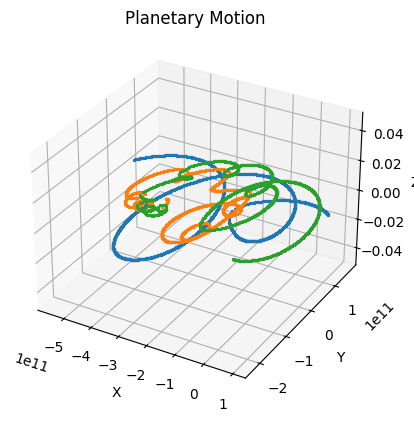

In [ ]:
cos30 = np.cos(np.deg2rad(30))
sin30 = np.sin(np.deg2rad(30))
mass = 2.0e30

bodies = [
    Body(1.5e11*np.array([cos30,sin30, 0]), 20e3*np.array([-cos30, sin30,0]), mass),      # Body 1
    Body(1.5e11*np.array([-cos30, sin30, 0]), 20e3*np.array([-cos30, -sin30, 0.0]), mass),  # Body 2
    Body(1.5e11*np.array([0,-1,0]), 20e3*np.array([1,0,0]), mass)       # Body 3
]

# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 1000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

# Animate the results
animate_trajectories(positions, num_steps, delta_t )

#### **Stable Three Body System becomes UNSTABLE**

In the same simulation, we initially set up a three-body system that appears stable. However, running it over a longer duration reveals its inherent instability, demonstrating a common behavior in three-body interactions. The gravitational interactions gradually destabilise the configuration, eventually leading to chaotic behavior and ejection the bodies.

<ipython-input-28-63c19f37217a>:23: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(z_min, z_max)


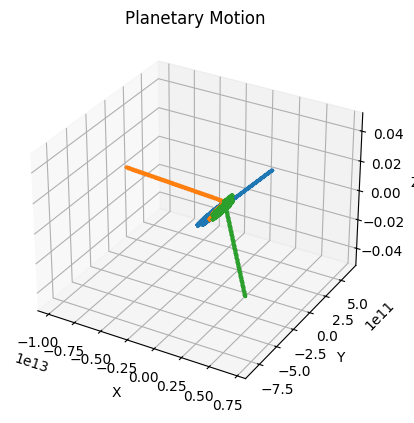

In [ ]:
cos30 = np.cos(np.deg2rad(30))
sin30 = np.sin(np.deg2rad(30))
mass = 2.0e30

bodies = [
    Body(1.5e11*np.array([cos30,sin30, 0]), 20e3*np.array([-cos30, sin30,0]), mass),      # Body 1
    Body(1.5e11*np.array([-cos30, sin30, 0]), 20e3*np.array([-cos30, -sin30, 0.0]), mass),  # Body 2
    Body(1.5e11*np.array([0,-1,0]), 20e3*np.array([1,0,0]), mass)       # Body 3
]

# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 2000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

# Animate the results
animate_trajectories(positions, num_steps, delta_t )

###Energy check for Euler

To assess the stability and accuracy of our simulation, we implemented an energy check for the Euler method. This check calculates the total energy of the system—sum of kinetic and potential energy—at each time step, allowing us to monitor deviations over time. Ideally, the total energy in an isolated system should remain constant; however, due to the numerical nature of the Euler method, we expect to see some drift.

In practice, this energy check reveals the limitations of the Euler method for long-term simulations. Significant changes in total energy suggest potential inaccuracies, especially over extended periods.


Since Euler's method uses a first-order approximation, it can introduce significant numerical errors, especially in chaotic systems like the three-body problem. These errors can cause the total energy to drift over time.

Checking energy conservation allows us to monitor the stability and accuracy of the simulation. If the total energy drifts significantly, it's a signal that the integration step size (delta) might be too large or that Euler's method may not be sufficient for the required **accuracy**.






Therefore, we implement a checker which ensures that energy is conserved throughout the simulation.

To determine if energy is conserved, we make use of the following formulae, where KE is kinetic energy and GPE is gravitational potential energy:
$$
E = ∑KE + ∑GPE
$$

$$
KE = \dfrac{1}{2}mv^2
$$

$$
GPE = -\dfrac{Gm_{1}m_{2}}{r}
$$

$$
E = \left(\frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2 + \frac{1}{2} m_3 v_3^2\right) + \left(-\frac{G m_1 m_2}{r_{12}} - \frac{G m_1 m_3}{r_{13}} - \frac{G m_2 m_3}{r_{23}}\right)
$$

In [ ]:
def simulatevel(bodies, delta, num_steps):
    velocities = [[] for _ in bodies]  # This creates list to store the positions of each body.

    for _ in range(num_steps):
        # Update accelerations first
        for body in bodies:
            body.update_acceleration(bodies)

        # Then we update the bodies' positions and velocities.
        for i, body in enumerate(bodies):
            body.update_position_and_velocity(delta)
            velocities[i].append(body.velocity.copy())

    return velocities

In [ ]:
# get positions for 1000 steps

cos30 = np.cos(np.deg2rad(30))
sin30 = np.sin(np.deg2rad(30))
mass = 2.0e30

bodies = [
    Body(1.5e11*np.array([cos30,sin30, 0]), 20e3*np.array([-cos30, sin30,0]), mass),      # Body 1
    Body(1.5e11*np.array([-cos30, sin30, 0]), 20e3*np.array([-cos30, -sin30, 0.0]), mass),  # Body 2
    Body(1.5e11*np.array([0,-1,0]), 20e3*np.array([1,0,0]), mass)       # Body 3
]

# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 1000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

In [ ]:
# Get velocities of bodies for 1000 steps
# Check if energy is conserved

cos30 = np.cos(np.deg2rad(30))
sin30 = np.sin(np.deg2rad(30))
mass = 2.0e30

bodies = [
    Body(1.5e11*np.array([cos30,sin30, 0]), 20e3*np.array([-cos30, sin30,0]), mass),      # Body 1
    Body(1.5e11*np.array([-cos30, sin30, 0]), 20e3*np.array([-cos30, -sin30, 0.0]), mass),  # Body 2
    Body(1.5e11*np.array([0,-1,0]), 20e3*np.array([1,0,0]), mass)       # Body 3
]

# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 1000  # Number of days

# Simulate the motion of the bodies
velocities = simulatevel(bodies, delta_t, num_steps)


InitialEnergy = (0.5 * (mass*(np.linalg.norm(velocities[0][0]))**2 + mass*(np.linalg.norm(velocities[1][0]))**2 + mass*(np.linalg.norm(velocities[2][0]))**2)
- G*(mass*mass/(np.linalg.norm(positions[0][0]-positions[1][0]))+mass*mass/(np.linalg.norm(positions[0][0]-positions[1][0])) + mass*mass/(np.linalg.norm(positions[1][0]-positions[2][0]))))

FinalEnergy = (0.5 * (mass*(np.linalg.norm(velocities[0][-1]))**2 + mass*(np.linalg.norm(velocities[1][-1]))**2 + mass*(np.linalg.norm(velocities[2][-1]))**2)
- G*(mass*mass/(np.linalg.norm(positions[0][-1]-positions[1][-1]))+mass*mass/(np.linalg.norm(positions[0][-1]-positions[1][-1])) + mass*mass/(np.linalg.norm(positions[1][-1]-positions[2][-1]))))

if math.isclose(InitialEnergy, FinalEnergy, rel_tol=1e0):
    print('Energy is conserved!')
else:
    print('Energy is NOT conserved!')

Energy is conserved!


###Energy is conserved!

We run `simulate` to get the positions at the start and the end.
We then reinitialise the bodies such that they start at their original positions, then we run `simulatevel` to get their velocities at the start and at the end.

Running on 1000 steps, we see that energy is conserved!

In [ ]:
# Get positions for 2000 steps

cos30 = np.cos(np.deg2rad(30))
sin30 = np.sin(np.deg2rad(30))
mass = 2.0e30

bodies = [
    Body(1.5e11*np.array([cos30,sin30, 0]), 20e3*np.array([-cos30, sin30,0]), mass),      # Body 1
    Body(1.5e11*np.array([-cos30, sin30, 0]), 20e3*np.array([-cos30, -sin30, 0.0]), mass),  # Body 2
    Body(1.5e11*np.array([0,-1,0]), 20e3*np.array([1,0,0]), mass)       # Body 3
]

# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 2000  # Number of days

# Simulate the motion of the bodies
positions = simulate(bodies, delta_t, num_steps)

In [ ]:
# Get velocitiess for 1000 steps
# Check if energy is conserved

cos30 = np.cos(np.deg2rad(30))
sin30 = np.sin(np.deg2rad(30))
mass = 2.0e30

bodies = [
    Body(1.5e11*np.array([cos30,sin30, 0]), 20e3*np.array([-cos30, sin30,0]), mass),      # Body 1
    Body(1.5e11*np.array([-cos30, sin30, 0]), 20e3*np.array([-cos30, -sin30, 0.0]), mass),  # Body 2
    Body(1.5e11*np.array([0,-1,0]), 20e3*np.array([1,0,0]), mass)       # Body 3
]

# Run the simulation with time step delta and 1000 steps
delta_t = 60*60*24  # 1 day in seconds
num_steps = 2000  # Number of days

# Simulate the motion of the bodies
velocities = simulatevel(bodies, delta_t, num_steps)


InitialEnergy = (0.5 * (mass*(np.linalg.norm(velocities[0][0]))**2 + mass*(np.linalg.norm(velocities[1][0]))**2 + mass*(np.linalg.norm(velocities[2][0]))**2)
- G*(mass*mass/(np.linalg.norm(positions[0][0]-positions[1][0]))+mass*mass/(np.linalg.norm(positions[0][0]-positions[1][0])) + mass*mass/(np.linalg.norm(positions[1][0]-positions[2][0]))))

FinalEnergy = (0.5 * (mass*(np.linalg.norm(velocities[0][-1]))**2 + mass*(np.linalg.norm(velocities[1][-1]))**2 + mass*(np.linalg.norm(velocities[2][-1]))**2)
- G*(mass*mass/(np.linalg.norm(positions[0][-1]-positions[1][-1]))+mass*mass/(np.linalg.norm(positions[0][-1]-positions[1][-1])) + mass*mass/(np.linalg.norm(positions[1][-1]-positions[2][-1]))))

if math.isclose(InitialEnergy, FinalEnergy, rel_tol=1e0):
    print('Energy is conserved!')
else:
    print('Energy is NOT conserved!')

Energy is NOT conserved!


## Energy is NOT conserved!

Running on 1000 steps, we see that energy is NOT conserved!

Extending the simulation over a longer duration reveals significant accumulation of errors inherent in the Euler method, resulting in energy not being conserved. This loss of energy conservation leads to instabilities that can cause one or more bodies to be ejected from the system. This observation emphasizes the limitations of simplistic numerical methods for modeling long-term dynamics, underscoring the necessity for more sophisticated approaches when dealing with the intricate gravitational interactions present in three-body systems.


#Phase 3: Improvements

#### **Checking energy for Euler's method**



In [ ]:
def three_body(end, delta=1):

  # Set up the figure and 3D axis
  fig = plt.gcf()
  ax = plt.gcf().add_subplot(projection='3d')

  # Set plot limits and labels
  ax.set_xlim(-500, 500)
  ax.set_ylim(-500, 500)
  ax.set_zlim(-500, 500)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.set_title('Planetary Motion')

  # Initialize plots for Earth, Sun and Moon
  earth_plot, = ax.plot([],[],[],'bo', label='Earth')
  earth_path, = ax.plot([],[],[],'b-',label='Earth path')

  sun_plot, = ax.plot([],[],[],'ro', label='Sun')
  sun_path, = ax.plot([],[],[],'r-',label='Sun path')

  moon_plot, = ax.plot([],[],[],'yo', label='Moon')
  moon_path, = ax.plot([],[],[],'y-',label='Moon path')

  # Create empty numpy arrays to store the bodies' paths
  earth_trajectory = np.empty((0, 3))
  sun_trajectory = np.empty((0, 3))
  moon_trajectory=np.empty((0,3))

  G = 10
  # set initial value for a varible to avoid printing error message multiple times
  warning_printed_already = False

  # Initialize plot elements
  def init():
    for plot, path in [(earth_plot, earth_path), (sun_plot, sun_path), (moon_plot, moon_path)]:
        plot.set_data([], [])
        plot.set_3d_properties([])
        path.set_data([], [])
        path.set_3d_properties([])
    return earth_plot, earth_path, sun_plot, sun_path, moon_plot, moon_path

  # Function to update positions and trajectories in each animation frame
  def update(frame):
    nonlocal earth_trajectory, sun_trajectory, moon_trajectory, warning_printed_already

    # Copy the previous states of each celestial body
    old_sun,old_earth,old_moon = sun.copy(),earth.copy(),moon.copy()

    # Calculating total energy at current time point
    E0 = 0.5 * (old_sun.mass * np.linalg.norm(old_sun.velocity)**2 +
                 old_earth.mass * np.linalg.norm(old_earth.velocity)**2 +
                 old_moon.mass * np.linalg.norm(old_moon.velocity)**2)-G * (old_sun.mass * old_earth.mass / np.linalg.norm(old_sun.position - old_earth.position) +
               old_moon.mass * old_earth.mass / np.linalg.norm(old_moon.position - old_earth.position) +
               old_sun.mass * old_moon.mass / np.linalg.norm(old_sun.position - old_moon.position))

    # Update each body's position based on the gravitational effect of the others
    sun.update(delta,old_earth,old_moon)
    earth.update(delta,old_sun,old_moon)
    moon.update(delta,old_sun,old_earth)

    # Calculating total energy at next time point
    Et = 0.5 * (sun.mass * np.linalg.norm(sun.velocity)**2 +
                 earth.mass * np.linalg.norm(earth.velocity)**2 +
                 moon.mass * np.linalg.norm(moon.velocity)**2)-G * (sun.mass * earth.mass / np.linalg.norm(sun.position - earth.position) +
               moon.mass * earth.mass / np.linalg.norm(moon.position - earth.position) +
               sun.mass * moon.mass / np.linalg.norm(sun.position - moon.position))

    # Update the current positions of the bodies in the plot
    for planet, plot in [(earth, earth_plot), (sun, sun_plot), (moon, moon_plot)]:
        plot.set_data([planet.position[0]], [planet.position[1]])
        plot.set_3d_properties([planet.position[2]])

    # Append the current positions to the trajectory arrays
    earth_trajectory = np.vstack([earth_trajectory, earth.position])# to stack a list of 1D arrays vertically(row by row) to form a 2D array
    sun_trajectory = np.vstack([sun_trajectory, sun.position])
    moon_trajectory = np.vstack([moon_trajectory, moon.position])

    # Update the trajectory paths in the plot
    for trajectory, path in [(earth_trajectory, earth_path), (sun_trajectory, sun_path), (moon_trajectory, moon_path)]:
        path.set_data(trajectory[:, 0], trajectory[:, 1])
        path.set_3d_properties(trajectory[:, 2])

    # Energy checker to print warning message when energy is not conserved
    if not math.isclose(E0, Et, rel_tol=1e-1) and not warning_printed_already:
      print(f"Warning: Energy is not conserved from time point {frame}")
      #Make sure it only print the warning message once
      warning_printed_already = True

    return earth_plot, sun_plot, earth_path, sun_path, moon_plot, moon_path

  # Create the animation
  ani = animation.FuncAnimation(fig=fig, func=update, frames=int(end / delta), init_func=init, blit=True, interval=100)
  return ani

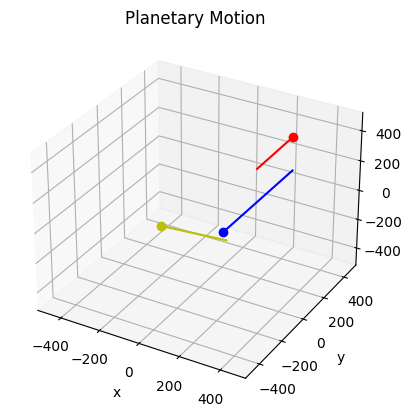

In [ ]:
three_body(100) # slide 27

#### **Checking energy conservation in RK method**

In [ ]:
def calculate_initial_energy(sun, earth, moon):
    KE = 0.5 * (sun.mass * np.linalg.norm(sun.velocity)**2 +
                 earth.mass * np.linalg.norm(earth.velocity)**2 +
                 moon.mass * np.linalg.norm(moon.velocity)**2)
    GPE = G * (sun.mass * earth.mass / np.linalg.norm(sun.position - earth.position) +
               moon.mass * earth.mass / np.linalg.norm(moon.position - earth.position) +
               sun.mass * moon.mass / np.linalg.norm(sun.position - moon.position))
    E0 = KE - GPE
    return E0

def energy_checker(frame, solution, sun, earth, moon, masses):
  # We extract the positions and velocities of the three bodies from the solution.
  earth_pos, sun_pos, moon_pos = solution.y[0:3,frame], solution.y[3:6,frame], solution.y[6:9,frame]
  earth_vel, sun_vel, moon_vel = solution.y[9:12,frame], solution.y[12:15,frame], solution.y[15:18,frame]

  # We calculate the total energy at each time frame.
  Et = 0.5 * (masses[1]*(np.linalg.norm(sun_vel))**2 + masses[0]*(np.linalg.norm(earth_vel))**2 + masses[2]*(np.linalg.norm(moon_vel))**2) - G*(masses[1]*masses[0]/(np.linalg.norm(sun_pos-earth_pos))+masses[2]*masses[0]/(np.linalg.norm(moon_pos-earth_pos)) + masses[1]*masses[2]/(np.linalg.norm(sun_pos-moon_pos)))

  # We check if energy is conserved by taking the difference between total initial energy and total energy at each time frame to find out when energy is no longer conserved.
  E0 = calculate_initial_energy(sun, earth, moon)

  if math.isclose(E0, Et, rel_tol=1e-1):
    return True # When energy is conserved.

  else:
    return False # When energy is not conserved.

## Runge Kutta's Method
Since our Euler's method fail to conserve the energy, we decided to improve our model with a more accurate numerical method.
Instead of using Euler's Method to continuously update the plot, we will now try the Runge Kutta method. This is a numerical technique used to solve ordinary differential equations (ODEs) with higher accuracy than Euler's Method. For simulating three body systems, we shall use the Runge-Kutta-Fehlberg method, often denoted as RK45.

In our codes, we make use of the `SciPy` package in order to utilise the Runge Kutta method.

Due to the volatility of three body systems, we need to make the following **assumptions** before we can simulate three body systems using this second methods:
- The checker for the Roche Limit is based on the assumption that all the bodies are spherical in shape.
- Only gravitational interaction is considered.
- All three bodies are non-rigid bodies.


### **Defining the Ordinary Differential Equation (ODE)**

We start by defining a function `gra_acc` which takes in the arguments: mass of the home planet and the positions of the two bodies.

This function is used in the ODEs to avoid redundancy.

`gra_acc` then calculates the gravitational acceleration between 2 bodies, and gives both the magnitude and direction of the acceleration!

In [ ]:
def gra_acc(m1,r1,r0):
  return G*m1*(r1-r0)/(np.linalg.norm(r1-r0))**3

We defiine a function `three_body_ODE` which uses `gra_acc` to calculate the net accelerations of each planet. This function will be the input for our ODE solver later on.

This function takes in the arguments the time variable t, state which is the 1D array consisting of the position and velocity vectors of the three bodies, and masses of the bodies in the form of an array.

The function then returns one array consisting of the velocities and net accelerations of the bodies.

In [ ]:
def three_body_ODE(t, state, masses):
    pos = state[:9].reshape(3, 3)
    vel = state[9:].reshape(3, 3)

    acc_sun = gra_acc(masses[0], pos[0], pos[1]) + gra_acc(masses[2], pos[2], pos[1])
    acc_earth = gra_acc(masses[1], pos[1], pos[0]) + gra_acc(masses[2], pos[2], pos[0])
    acc_moon = gra_acc(masses[1], pos[1], pos[2]) + gra_acc(masses[0], pos[0], pos[2])
    acc = np.array([acc_earth, acc_sun, acc_moon])

    return np.concatenate([vel.flatten(), acc.flatten()])

## Roche Limit checker

We define a new function `roche_limit_calculator` to calculate the minimum separation between two bodies to ensure that the gravitational field of a larger body does not overpower the gravitational forces holding a smaller body together.

The Roche limit $d$ can be calculated as follows:

$$
d = 2.44 \times R \times \left( \frac{\rho_M}{\rho_m} \right)^{\frac{1}{3}}
$$

Where:
- $ d $ is the minimum separation between the two bodies.
- $ 2.44 $ is the Roche constant for non-rigid bodies.
- $ R $ is the radius of the smaller body.
- $ \rho_M $ is the density of the larger body.
- $ \rho_m $ is the density of the smaller body.



\
The function begins by determining which body has the greater mass, this is stored as `larger_body_mass` and the smaller body by mass is stored as `smaller_body_mass`. The radius of the smaller body is stored as `smaller_body_radius`.

Assuming the bodies are spherical, we calculate density using

$$
\rho = \frac{mass}{\frac{4}{3}πr^3}
$$

where the denominator represents the volume of a sphere.

In [ ]:
# Define function to calculator roche limit to avoid redundancy
def density_calculator(m,r):
  density=m/(4/3*(np.pi)*r**3)
  return density

# Define a roche_limit_calculator to compute the minimum seperation allowed between each two pairs of planets
def roche_limit_calculator(m1, m2, r1, r2):
    larger_body_mass = m1 if m1 > m2 else m2
    smaller_body_mass = m2 if m2 < m1 else m1
    larger_body_radius = r2 if m2 > m1 else r1
    smaller_body_radius = r1 if m1 < m2 else r2
    larger_body_density = density_calculator(larger_body_mass,larger_body_radius)
    smaller_body_density = density_calculator(smaller_body_mass,smaller_body_radius)
    minimum_sep = 2.44 * smaller_body_radius * (larger_body_density / smaller_body_density )**(1/3)
    return minimum_sep

# roceh_limit_checker to compare the seperation between planets with the roche limit
def roche_limit_check(frame, solution, earth, sun, moon):
    # use roche_limit_calculator to calculate roche limit
    earth_sun_limit = roche_limit_calculator(sun.mass, earth.mass, sun.radius, earth.radius)
    moon_sun_limit = roche_limit_calculator(moon.mass, sun.mass, moon.radius, sun.radius)
    moon_earth_limit = roche_limit_calculator(moon.mass, earth.mass, moon.radius, earth.radius)


    earth_pos, sun_pos, moon_pos = solution.y[0:3, frame], solution.y[3:6, frame], solution.y[6:9, frame]
    # calculate the seperation between planets
    earth_sun_sep = np.linalg.norm(earth_pos - sun_pos) - sun.radius - earth.radius
    moon_sun_sep = np.linalg.norm(moon_pos - sun_pos) - sun.radius - moon.radius
    moon_earth_sep = np.linalg.norm(moon_pos - earth_pos) - earth.radius - moon.radius

    # return results based on whether roche limit is violated or not
    if earth_sun_sep < earth_sun_limit:
        return True, 'Earth and Sun too close', solution.t[frame]
    elif moon_earth_sep < moon_earth_limit:
        return True, 'Moon and Earth too close', solution.t[frame]
    elif moon_sun_sep < moon_sun_limit:
        return True, 'Moon and Sun too close', solution.t[frame]
    else:
        return False, '', solution.t[-1]

## Creating Planet Class

In [ ]:
# We first define a class to initialise the parameters of a body and we also initialise the acceleration as a zero vector as it is yet to be updated.
class Planet:
  def __init__(self, position, mass, radius, velocity):
    self.position = np.array(position,dtype=float) # input a tuple or array of any dimension
    self.mass = mass
    self.radius=radius
    self.velocity = np.array(velocity,dtype=float)
    self.acc = np.zeros(len(position),dtype=float)

## Creating animation

#### **Defining function for animation**

In [ ]:
# Define update function for animation
def update(frame, solution, earth_plot, sun_plot, moon_plot, earth_path, sun_path, moon_path):
    earth_pos, sun_pos, moon_pos = solution.y[0:3, frame], solution.y[3:6, frame], solution.y[6:9, frame]

    for planet_pos, plot in [(earth_pos, earth_plot), (sun_pos, sun_plot), (moon_pos, moon_plot)]:
        plot.set_data([planet_pos[0]], [planet_pos[1]])
        plot.set_3d_properties([planet_pos[2]])

    for i, path in zip([0, 3, 6], [earth_path, sun_path, moon_path]):
        path.set_data(solution.y[i, :frame+1], solution.y[i+1, :frame+1])
        path.set_3d_properties(solution.y[i+2, :frame+1])

    return earth_plot, sun_plot, moon_plot, earth_path, sun_path, moon_path

#### **Function to create animation**

Energy is conserved, and Roche limit is not violated within the time range.


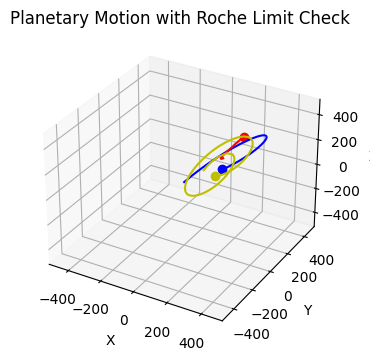

In [ ]:
# Main function to run the simulation
G = 10
def starstuff(end, delta1=1, pos1=(0, 0, 0), pos2=(150, 150, 150), pos3=(75, 75, 75),
              mass1=1000, mass2=10000, mass3=100, radius1=10, radius2=20, radius3=5,
              vel1=(0, 25, 0), vel2=(0, 0, 0), vel3=(0, 30, 10)):
    delta = delta1
    masses = np.array([mass1, mass2, mass3])

    # Initialise planets
    earth = Planet(pos1, mass1, radius1, vel1)
    sun = Planet(pos2, mass2, radius2, vel2)
    moon = Planet(pos3, mass3, radius3, vel3)

    # Initial state for solve_ivp
    initial_state = np.hstack((pos1, pos2, pos3, vel1, vel2, vel3))

    # Solve the ODE
    solution = solve_ivp(three_body_ODE, (0, end), initial_state, args=(masses,), method='RK45', t_eval=np.arange(0, end, delta))

    # Create a figure for the animation
    fig = plt.figure(figsize=(4, 4))
    ax = plt.gcf().add_subplot(projection = '3d')

    #set plot limits and labels
    ax.set_xlim(-500, 500)
    ax.set_ylim(-500, 500)
    ax.set_zlim(-500, 500)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Planetary Motion with Roche Limit Check')

    # Plotting the graph
    earth_plot, = ax.plot([], [], [], 'bo', label='Earth')
    sun_plot, = ax.plot([], [], [], 'ro', label='Sun')
    moon_plot, = ax.plot([], [], [], 'yo', label='Moon')
    earth_path, = ax.plot([], [], [], 'b-', label='Earth path')
    sun_path, = ax.plot([], [], [], 'r-', label='Sun path')
    moon_path, = ax.plot([], [], [], 'y-', label='Moon path')

    # Carry out energy and Roche Limit checker
    for i in range(len(solution.t)):
        roche_limit_violated, message, violation_time = roche_limit_check(i, solution, earth, sun, moon)
        if roche_limit_violated:
            break
    for i in range(len(solution.t)):
      energy_conserved = energy_checker(i, solution, sun, earth, moon, masses)
      if not energy_conserved:
        break

    # Return different results based on the output of the two checkers
    if not roche_limit_violated and energy_conserved:
      ani = animation.FuncAnimation(fig, update, frames=len(solution.t), fargs=(solution, earth_plot, sun_plot, moon_plot, earth_path, sun_path, moon_path), init_func=lambda: [earth_plot, sun_plot, moon_plot], blit=True, interval = 100)
      print("Energy is conserved, and Roche limit is not violated within the time range.")
      return ani
    elif not energy_conserved:
      print("Energy is not conserved, model is not reliable")
      ani = animation.FuncAnimation(fig, update, frames=len(solution.t), fargs=(solution, earth_plot, sun_plot, moon_plot, earth_path, sun_path, moon_path), init_func=lambda: [earth_plot, sun_plot, moon_plot], blit=True, interval = 100)
      return ani
    else:
      ani_explode = animation.FuncAnimation(fig, update, frames=int(violation_time/delta1), fargs=(solution, earth_plot, sun_plot, moon_plot, earth_path, sun_path, moon_path), init_func=lambda: [earth_plot, sun_plot, moon_plot], blit=True, interval = 100)
      print(f'Planets are getting too close. {message} Roche limit is violated at {violation_time}')
      return ani_explode

starstuff(100) # slide 27